## AI Capstone - Luke J Nonyane

### DESCRIPTION
Problem Statement
•	Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided. 
•	The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.
•	You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

#### Project Task: Week 1

##### EDA - Class Imbalance Problem
•	See what a positive, negative, and neutral review looks like

•	Check the class count for each class. It’s a class imbalance problem.


In [1]:
# load data
# train
import pandas as pd
train_data = pd.read_csv('data/train_data.csv')

# test
test_data = pd.read_csv('data/test_data_hidden.csv')

print(train_data.shape, test_data.shape)
train_data.head()

(4000, 8) (1000, 8)


,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [28]:
#test_data.head()

In [2]:
# checking class count data weight
train_data['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

We have a class imbalance that favors the Positive sentiment.

In [3]:
# text clean up
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
import re
import string
import warnings
warnings.filterwarnings('ignore')
import numpy as np
#words = set(nltk.corpus.words.words())
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)

# extract tokens from each 'review' of the dataframe using lambda function.
# check whether tokens are stop words, lemmatize them and join them side by side using join function.
# replace anything other than digits, letters, and white spaces with blank spaces.

train_data['cleaned_reviews.text'] = train_data['reviews.text']\
.apply(lambda x : ' '.join\
 ([lemmatizer.lemmatize\
  (word.lower()) \
  for word in word_tokenize\
  (re.sub(r'([^\s\w]|_)+', ' ',\
   str(x))) if word not in stop_words])) 

In [5]:
train_data[['cleaned_reviews.text', 'reviews.text']].head()

,cleaned_reviews.text,reviews.text
0,purchased black fridaypros great price even sa...,Purchased on Black FridayPros - Great Price (e...
1,purchased two amazon echo plus two dot plus fo...,I purchased two Amazon in Echo Plus and two do...
2,just average alexa option doe show thing scree...,Just an average Alexa option. Does show a few ...
3,good product exactly wanted good price,"very good product. Exactly what I wanted, and ..."
4,this 3rd one purchased bought one niece no cas...,This is the 3rd one I've purchased. I've bough...


In [6]:
# TFIDF vectorizer with 2000 max features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(max_features=2000) # Test set max is 2513.
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(train_data['cleaned_reviews.text']).todense()) # todense() creates matrix
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,10,100,11,11yr,12,13,14,15,16,...,yr,äôd,äôll,äôm,äôre,äôs,äôt,äôve,äù,äúalexa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22441,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.131346,0.0,0.111477,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [7]:
# clean test data reviews.text
test_data['cleaned_reviews.text'] = test_data['reviews.text']\
.apply(lambda x : ' '.join\
 ([lemmatizer.lemmatize\
  (word.lower()) \
  for word in word_tokenize\
  (re.sub(r'([^\s\w]|_)+', ' ',\
   str(x))) if word not in stop_words]))

In [8]:
# TFIDF vectorizer with 2000 max features for test set
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_model = TfidfVectorizer(max_features=2000) # Test set max is 2513.
tfidf_df_test = pd.DataFrame(tfidf_model.fit_transform(test_data['cleaned_reviews.text']).todense()) # todense() creates matrix
tfidf_df_test.columns = sorted(tfidf_model.vocabulary_)
tfidf_df_test.head()

,00,10,100,105,11,12,128,128gb,139,15,...,äôll,äôm,äôre,äôs,äôt,äôve,äù,äùcrestron,äú,äúalexa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TFIDF representation of cleaned up 'reviews.text'.

###### Multinomial Naive Bayes Classifier

In [9]:
# training and validation sets.
X_train = tfidf_df # independent variables
y_train = train_data['sentiment'] # labels
X_valid = tfidf_df_test # independent variables for test
y_valid = test_data['sentiment'] # labels

In [10]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((4000, 2000), (4000,), (1000, 2000), (1000,))

In [12]:
# Binarize labes in order to use ROC curve to calculate AUC.
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

y_train_bin = label_binarize(y_train, classes=['Positive', 'Neutral', 'Negative'])
n_classes = 3

y_valid_bin = label_binarize(y_valid, classes=['Positive', 'Neutral', 'Negative'])

In [11]:
# classifier method
def clf_model(model_type, X_train, y_train, X_valid):
    model = model_type.fit(X_train, y_train)
    predicted_labels = model.predict(X_valid)
    predicted_probab = model.predict_proba(X_valid)[:,1] # score
    return [predicted_labels, predicted_probab, model]

In [45]:
# model evaluation method
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_curve
def model_evaluation(actual_values, predicted_values, predicted_probabilities):
    # confusion matrix
    cfn_mat = confusion_matrix(actual_values, predicted_values)
    print("confusion matrix:",cfn_mat)
    print("\naccuracy:",accuracy_score(actual_values, predicted_values))
    print("\nclassification report:",classification_report(actual_values, predicted_values))
    
    # ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw=2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_valid, predicted_probabilities, pos_label='Positive')
        roc_auc[i] = auc(fpr[i], tpr[i])
        #colors = cycle(['blue', 'red', 'green'])
    
    # Mircro-average ROC curve and ROC area
    fpr['micro'], tpr['micro'], _ = roc_curve(y_valid.ravel(), predicted_probabilities.ravel(), pos_label='Positive')
    roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])
    
    # Plot ROC curves for multiclass problem
    # aggregate all false positve rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    
    # Interpolate all ROC curves
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
    # Average and compute AUC
    mean_tpr /= n_classes
    
    fpr['macro'] = all_fpr
    tpr['macro'] = mean_tpr
    roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])
    
    # Plot all ROC curves
    plt.figure()
    plt.plot(
        fpr['micro'],
        tpr['micro'],
        label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc['micro']),
        color='deeppink',
        linestyle=':',
        linewidth=4
    )
    
    plt.plot(
        fpr['macro'],
        tpr['macro'],
        label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc['macro']),
        color='navy',
        linestyle=':',
        linewidth=4
    )
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color = color,
            lw = lw,
            label = 'ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i])
        )
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    """
    fpr,tpr,threshold = roc_curve(actual_values,predicted_probabilities)
    print("\nArea under ROC curve for validation set:",auc(fpr,tpr))
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(fpr,tpr,label='Validation set AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ax.legend(loc='best')
    plt.show()
    """

In [ ]:
# 

In [14]:
#  MultinomialNB model
from sklearn.naive_bayes import MultinomialNB

# Predict each class against each other
clf = OneVsRestClassifier(MultinomialNB())
multinomialNB_results = clf_model(clf, X_train, y_train, X_valid)

confusion matrix: [[  0   3  21]
 [  0   5  34]
 [ 14  78 845]]

accuracy: 0.85

classification report:               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.06      0.13      0.08        39
    Positive       0.94      0.90      0.92       937

    accuracy                           0.85      1000
   macro avg       0.33      0.34      0.33      1000
weighted avg       0.88      0.85      0.87      1000



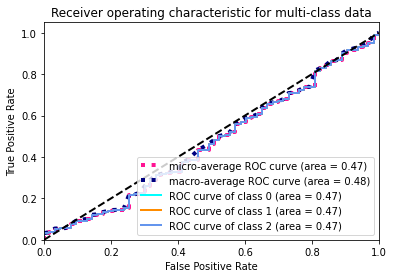

In [46]:
# model evaluation
# actual values, pred values, pred probab
model_evaluation(y_valid, multinomialNB_results[0], multinomialNB_results[1])

##### Tackling Class Imbalance Problem